<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Predict Closing price





## Table of Content

1. [Upload dataset from your local drive to colab](#colab)
2. [Importing the packages](#import)
3. [Reading the dataset](#read)
4. [Exploring the data](#explore)
5. [Importing more packages for prediction](#import2)
6. [Train Test Split](#split)
7. [Building the model](#model)
8. [Prediction on ts_test](#prediction1)
9. [Prediction with Test data](#prediction2)

### 1. Upload dataset from your local drive to colab   <a id='colab'>

In [0]:
from google.colab import files
files.upload()

Saving Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv to Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv
Saving Uniqlo(FastRetailing) 2017 Test - stocks2017.csv to Uniqlo(FastRetailing) 2017 Test - stocks2017.csv


{'Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv': b'Date,Open,High,Low,Close,Volume,Stock Trading\r\n2016-12-30,42120,42330,41700,41830,610000,25628028000\r\n2016-12-29,43000,43220,42540,42660,448400,19188227000\r\n2016-12-28,43940,43970,43270,43270,339900,14780670000\r\n2016-12-27,43140,43700,43140,43620,400100,17427993000\r\n2016-12-26,43310,43660,43090,43340,358200,15547803000\r\n2016-12-22,43660,43840,43190,43480,381600,16586491000\r\n2016-12-21,43900,44370,43610,44000,658900,28994316000\r\n2016-12-20,42910,43630,42860,43620,499400,21606102000\r\n2016-12-19,42790,43150,42740,43130,358700,15428531000\r\n2016-12-16,43350,43550,42810,43130,542000,23380606000\r\n2016-12-15,43440,43880,42550,43000,627400,27055034000\r\n2016-12-14,43300,43440,42590,43090,548800,23600236000\r\n2016-12-13,43130,43300,42630,43210,434500,18658982000\r\n2016-12-12,43950,44000,42880,43130,775300,33633233000\r\n2016-12-09,41700,42970,41150,42590,1975600,83251556000\r\n2016-12-08,41480,41560,408

## 2. Importing the packages and the dataset   <a id='import'>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go

from pyramid.arima import auto_arima

from fbprophet import Prophet


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor 


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV




df=pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

Using TensorFlow backend.



## Preprocessing the data

We require ony 2 columns: Date and Close

In [0]:

# Preprocessing for Auto-Arima

cols=['Date','Close']
new_df=df[cols]

# Converting date column to datatime format
new_df['Date']=pd.to_datetime(new_df['Date'], format='%Y-%m-%d')

reverse_df = new_df.sort_index(axis=0, ascending=False)


# Setting the index as Date
reverse_df=reverse_df.set_index("Date")

# Train Test Split
prediction_days = 30

ts_train= reverse_df[:len(reverse_df)-prediction_days]       # Remove 30 days from the end for Training data
ts_test= reverse_df[len(reverse_df)-prediction_days:]        # Last 30 days values for test


# Preprocessing for Prophet
prophet_df = df.copy()
prophet_df = prophet_df.rename(columns={"Date":'ds', "Close":'y'})
prophet_df = prophet_df.iloc[:,[0,4]]


# Preprocessing for LSTM
min_max_scaler = MinMaxScaler()
training_set=ts_train['Close'].values
training_set = training_set.reshape(-1,1)
training_set = min_max_scaler.fit_transform(training_set)
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

lstm_ts_test = ts_test['Close']

# New Data for testing
test_data=pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")
test_data1=test_data.iloc[:,4]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



## Visualizing the data

In [0]:
data=[go.Scatter(x=reverse_df.index,y=reverse_df)]
py.iplot(data)

# Modelling

### Auto - ARIMA

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=19471.087, BIC=19501.603, Fit time=0.797 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=19484.610, BIC=19494.782, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=19477.231, BIC=19492.489, Fit time=0.084 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=19478.342, BIC=19493.600, Fit time=0.075 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=19476.078, BIC=19501.508, Fit time=0.352 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=19476.201, BIC=19501.631, Fit time=0.545 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=19472.944, BIC=19508.545, Fit time=0.971 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=19476.668, BIC=19497.011, Fit time=0.205 seconds
Fit ARIMA: order=(3, 1, 3) season

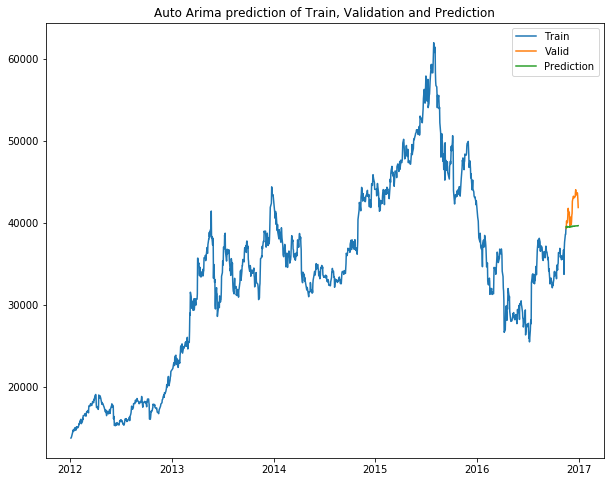

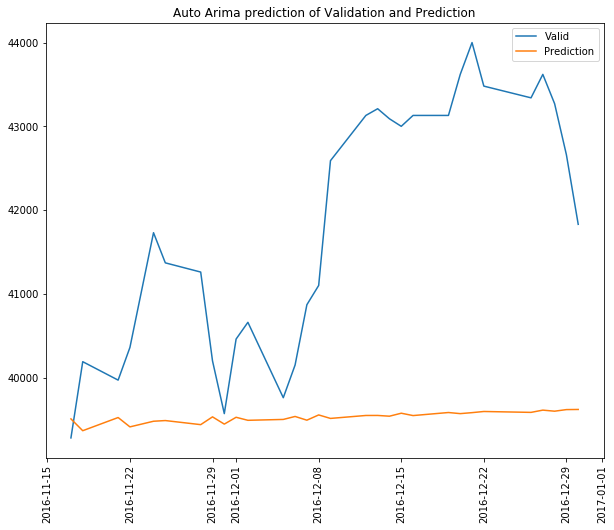

,Prediction,Close
Date,,
2016-11-17,39507.073948,39280
2016-11-18,39365.990046,40190
2016-11-21,39523.304619,39970
2016-11-22,39411.706734,40360
2016-11-24,39478.954232,41730


In [0]:
# Training the Arima Model
def arima_model(train_data, val_data, prediction_days):

    model = auto_arima(train_data,trace=True, error_action='ignore', suppress_warnings=True)
    model.fit(train_data)

    forecast = model.predict(n_periods=prediction_days)
    forecast = pd.DataFrame(forecast,index = val_data.index,columns=['Prediction'])
    return forecast

#plot the predictions for validation set
def plot_train_val(train_data, val_data,forecast):
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(111)
    ax.plot(train_data, label='Train')
    ax.plot(val_data, label='Valid')
    ax.plot(forecast, label='Prediction')
    ax.legend()
    plt.title('Auto Arima prediction of Train, Validation and Prediction')
    plt.show()
    
# Plot only the predicted and actual price of validation data
def plot_val(test_data, forecast):
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(1,1,1)
    ax.plot(test_data, label='Valid')
    ax.plot(forecast, label='Prediction')
    plt.xticks(rotation=90)
    ax.legend()
    plt.title('Auto Arima prediction of Validation and Prediction')
    plt.show()
    
forecast = arima_model(ts_train, ts_test, prediction_days)
plot_train_val(ts_train, ts_test, forecast)
plot_val(ts_test, forecast)


forecast = pd.concat([forecast, ts_test], axis=1)
forecast.head()

### Facebook Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


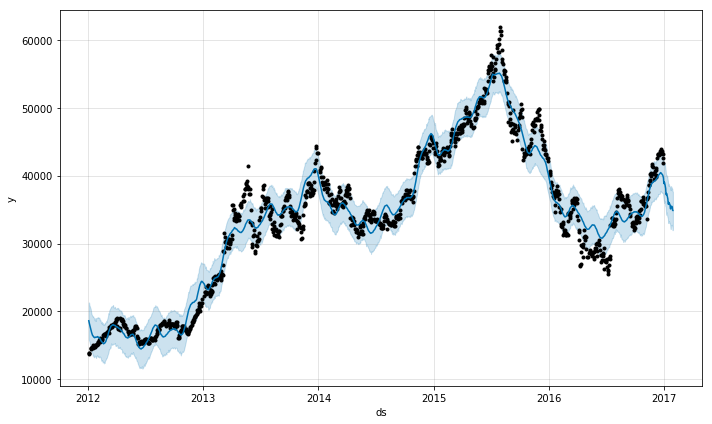

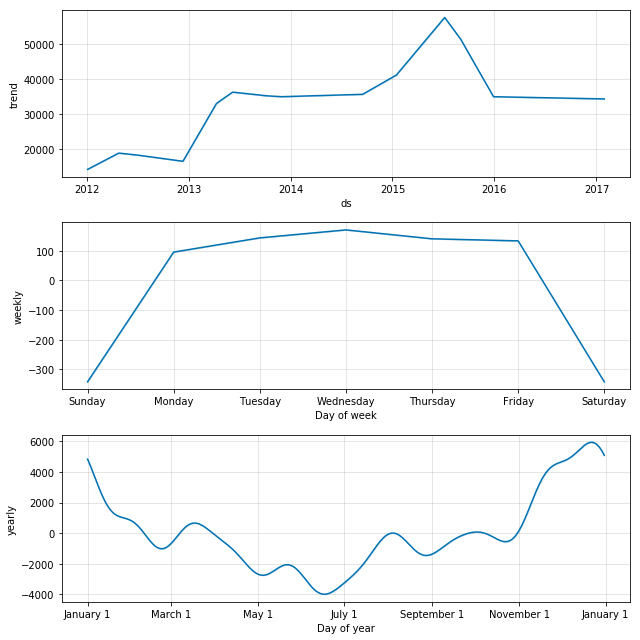

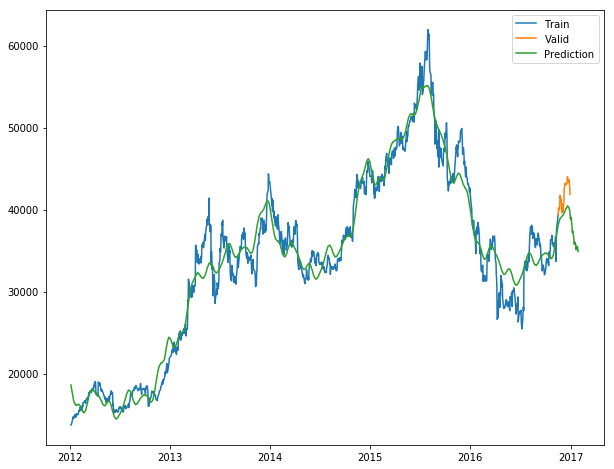

,yhat,Close
2016-12-16,40172.056564,43130.0
2016-12-19,40319.247268,43130.0
2016-12-20,40403.998618,43620.0
2016-12-21,40451.809791,44000.0
2016-12-22,40424.920424,43480.0
2016-12-26,40188.132835,43340.0
2016-12-27,40133.471075,43620.0
2016-12-28,40036.047467,43270.0
2016-12-29,39860.699740,42660.0
2016-12-30,39688.486056,41830.0


In [0]:
def prophet_model(train_data, prediction_days):
    m = Prophet()
    m.fit(train_data)
    future=m.make_future_dataframe(periods=prediction_days)
    forecast = m.predict(future)
    m.plot(forecast);
    m.plot_components(forecast);
    forecast = forecast[['ds','yhat']]
    return forecast

forecast = prophet_model(prophet_df, prediction_days) 

forecast = forecast.set_index('ds')

fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(ts_train, label='Train')
ax.plot(ts_test, label='Valid')
ax.plot(forecast, label='Prediction')
ax.legend()
plt.show()

prophet = pd.concat([forecast, reverse_df], axis=1)
prophet.tail(40)

### 5 Importing more packages for prediction   <a id='import2'>

### 7. Building our model   <a id='model'>

In [0]:
# Create model for Keras Regressor
def create_model(optimizer='adam', learn_rate=0.01, units = 8, activation_function = 'sigmoid',loss_function = 'mean_squared_error'):
    regressor = Sequential()
    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = units, activation = activation_function, input_shape=(None, 1)))
    # Adding the output layer
    regressor.add(Dense(units = 1))
    # Compiling the RNN
    regressor.compile(optimizer = optimizer, loss = loss_function)
    return regressor

# define the grid search parameters
def fit_model(x_train, y_train, model):

    optimizer = ['SGD', 'RMSprop'] #, 'Adadelta', 'Adam']
    batch_size = [10, 20] #, 40, 60, 80, 100]
    epochs = [10, 50]  #, 100]
    learn_rate = [0.001, 0.01, 0.1]
    units = [8,16,32]
    param_grid = dict(optimizer=optimizer , batch_size=batch_size, epochs=epochs, learn_rate=learn_rate, units = units)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(x_train, y_train)
    return grid_result

# summarize results
def display_grid_result(grid_result):
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
        
model = KerasRegressor(build_fn=create_model, verbose = 0)
grid_result = fit_model(x_train, y_train, model)

display_grid_result(grid_result)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Best: -0.000309 using {'batch_size': 10, 'epochs': 50, 'learn_rate': 0.01, 'optimizer': 'RMSprop', 'units': 16}
-0.083488 (0.053398) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD', 'units': 8}
-0.080506 (0.047087) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD', 'units': 16}
-0.082048 (0.051866) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'SGD', 'units': 32}
-0.039443 (0.027763) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop', 'units': 8}
-0.023404 (0.016985) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop', 'units': 16}
-0.011990 (0.013788) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.001, 'optimizer': 'RMSprop', 'units': 32}
-0.076571 (0.042491) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'optimizer': 'SGD', 'units': 8}
-0.084081 (0.053247) with: {'batch_size': 10, 'epochs': 10, 'learn_rate': 0.01, 'o


### 8. Prediction on ts_test   <a id='prediction1'>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



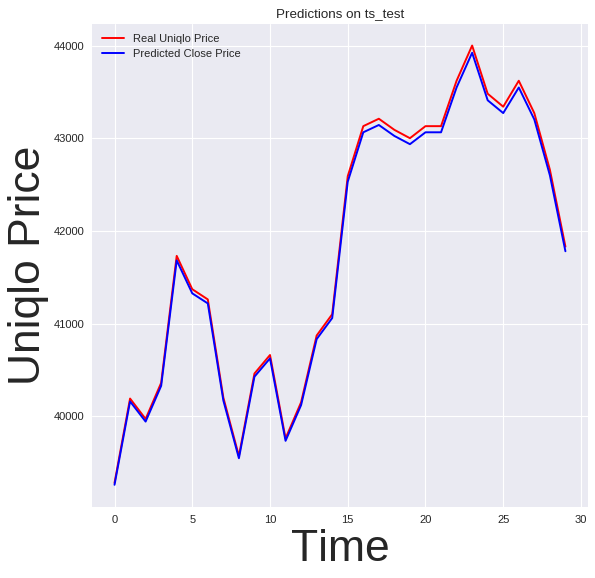

,LSTM Pred,Close
Date,,
2016-11-17,39259.046875,39280
2016-11-18,40159.085938,40190
2016-11-21,39941.531250,39970
2016-11-22,40327.171875,40360
2016-11-24,41681.144531,41730
2016-11-25,41325.464844,41370
2016-11-28,41216.769531,41260
2016-11-29,40168.968750,40200
2016-11-30,39545.917969,39570


Predictions with Test Data


array([[38417.926],
       [38002.17 ],
       [38546.598],
       [38675.254],
       [39694.28 ],
       [42530.55 ],
       [43221.613]], dtype=float32)

In [0]:
def lstm_predictions(test_set):
    
    test_set = test_set.values
    inputs = np.reshape(test_set, (len(test_set), 1))
    inputs = min_max_scaler.transform(inputs)
    inputs = np.reshape(inputs, (len(inputs), 1, 1))

    predicted_price = grid_result.predict(inputs)
    predicted_price = min_max_scaler.inverse_transform(predicted_price.reshape(-1,1))
    return predicted_price
    
    
def test_predictions(test_data):
  test_data = test_data.values
  inputs = np.reshape(test_data, (len(test_data), 1))
  inputs = min_max_scaler.transform(inputs)
  inputs = np.reshape(inputs, (len(inputs), 1, 1))

  new_predicted_price = grid_result.predict(inputs)
  new_predicted_price = min_max_scaler.inverse_transform(new_predicted_price.reshape(-1,1))
  return new_predicted_price
    
def plot_lstm_predictions(test_set, predicted_price):
    plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')
    plt.plot(test_set[:, 0], color='red', label='Real Uniqlo Price')
    plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted Close Price')
    plt.title('Uniqlo Price Prediction', fontsize = 40)
    plt.xlabel('Time', fontsize=40)
    plt.ylabel('Uniqlo Price', fontsize = 40)
    plt.title('Predictions on ts_test')
    plt.legend(loc = 'best')
    plt.show()
    
    
predicted_price = lstm_predictions(lstm_ts_test)


plot_lstm_predictions(lstm_ts_test.reshape(-1,1), predicted_price)

lstm_predictions = pd.DataFrame(predicted_price, columns = ['LSTM Pred'], index = ts_test.index)
lstm_predictions = pd.concat([lstm_predictions, ts_test], axis =1)
display(lstm_predictions)

print("Predictions with Test Data")
test_predictions = test_predictions(test_data1)
display(test_predictions)

# Comparative Models
## Auto-ARIMA

<p align="center">
<img src="https://raw.githubusercontent.com/rakeshmondal1989/Time-Series-Analysis/master/autoarima.PNG"></img>
<br/>

## Prophet
<p align="center">
<img src="https://raw.githubusercontent.com/rakeshmondal1989/Time-Series-Analysis/master/prophet.PNG"></img>
## LSTM
<p align="center">
<img src="https://raw.githubusercontent.com/rakeshmondal1989/Time-Series-Analysis/master/LSTM.PNG"></img>
